<a href="https://colab.research.google.com/github/eemgraham/World-Happiness-Index-Analysis/blob/main/World_Happiness_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel("WHI_Inflation.xlsx")

In [ ]:
# Show the 10 highest happiness scores
top_10 = df.nlargest(10, 'Score')
print(top_10[['Country', 'Score', 'Year']])


     Country   Score  Year
360  Finland  7.8420  2021
361  Finland  7.8210  2022
359  Finland  7.8087  2020
362  Finland  7.8040  2023
358  Finland  7.7690  2019
304  Denmark  7.6456  2020
306  Denmark  7.6360  2022
357  Finland  7.6320  2018
305  Denmark  7.6200  2021
303  Denmark  7.6000  2019


In [ ]:
# Show the 10 highest scores by individual country
df_sorted = df.sort_values(by='Score', ascending=False)
df_unique = df_sorted.drop_duplicates(subset='Country', keep='first')
top_10_unique = df_unique.nlargest(10, 'Score')
print(top_10_unique[['Country', 'Score', 'Year']])

          Country   Score  Year
360       Finland  7.8420  2021
304       Denmark  7.6456  2020
846        Norway  7.5940  2018
1057  Switzerland  7.5870  2015
460       Iceland  7.5610  2015
793   Netherlands  7.4880  2019
513        Israel  7.4730  2023
206        Canada  7.4270  2015
643    Luxembourg  7.4040  2022
1055       Sweden  7.3840  2022


In [ ]:
# Show the 10 lowest scores by inidividual country
bottom_10_unique = df_unique.nsmallest(10, 'Score')
print(bottom_10_unique[['Country', 'Score', 'Year']])

           Country  Score  Year
1032     Sri Lanka  4.471  2018
469          India  4.565  2015
1148        Uganda  4.636  2021
402          Ghana  4.657  2018
1118       Tunisia  5.045  2016
1158       Ukraine  5.084  2022
954        Senegal  5.132  2021
1013  South Africa  5.194  2022
1078    Tajikistan  5.199  2018
16         Albania  5.199  2022


In [ ]:
# Show the average happiness score by country
# Group by 'Country' and calculate the mean of 'Score'
average_scores = df.groupby('Country')['Score'].mean().reset_index()

# Rename column for clarity
average_scores.rename(columns={'Score': 'Average_Score'}, inplace=True)

# Sort by average score descending (optional)
average_scores = average_scores.sort_values(by='Average_Score', ascending=False)

print(average_scores)

                      Country  Average_Score
43                    Finland       7.662744
36                    Denmark       7.579733
55                    Iceland       7.522278
128               Switzerland       7.493322
99                     Norway       7.473889
..                        ...            ...
111                    Rwanda       3.398537
22                    Burundi       3.277900
121               South Sudan       3.269320
26   Central African Republic       3.202580
0                 Afghanistan       2.990767

[148 rows x 2 columns]


In [ ]:
# Handling Missing Data
df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)

In [ ]:
# Fill missing values with the string "Unknown"
df_filled = df.fillna("Unknown")
print(df_filled)


            Country  Year  Headline Consumer Price Inflation  \
10          Albania  2016                           1.291234   
11          Albania  2017                           1.987000   
12          Albania  2018                           2.030000   
13          Albania  2019                           1.411000   
14          Albania  2020                           1.620887   
...             ...   ...                                ...   
1186  United States  2023                           4.116338   
1187        Uruguay  2015                           8.668153   
1188        Uruguay  2016                           9.633797   
1205        Vietnam  2015                           0.644182   
1206        Vietnam  2016                           2.680397   

      Energy Consumer Price Inflation  Food Consumer Price Inflation  \
10                           0.040000                       3.249188   
11                           1.000000                       3.905430   
12             

In [ ]:
features = ['GDP per Capita', 'Energy Consumer Price Inflation', 'Headline Consumer Price Inflation', 'Food Consumer Price Inflation', 'Official Core Consumer Price Inflation',  'Producer Price Inflation', 'GDP deflator Index growth rate', 'Social support',  'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a new DataFrame with just 'Score' and selected features
selected_df = df[['Score'] + features]

# Compute Spearman correlation matrix
spearman_corr = selected_df.corr(method='spearman')

# Extract Spearman correlation values with 'Score' only
score_corr = spearman_corr['Score'].drop('Score')  # Drop self-correlation

# Display the results
print(score_corr.sort_values(ascending=False))

Perceptions of corruption                 0.669251
GDP per Capita                            0.648032
Freedom to make life choices              0.617513
Social support                            0.474632
Healthy life expectancy at birth          0.472856
Generosity                                0.446789
Energy Consumer Price Inflation           0.005524
Producer Price Inflation                 -0.081287
Official Core Consumer Price Inflation   -0.158736
GDP deflator Index growth rate           -0.161198
Food Consumer Price Inflation            -0.161990
Headline Consumer Price Inflation        -0.183083
Name: Score, dtype: float64


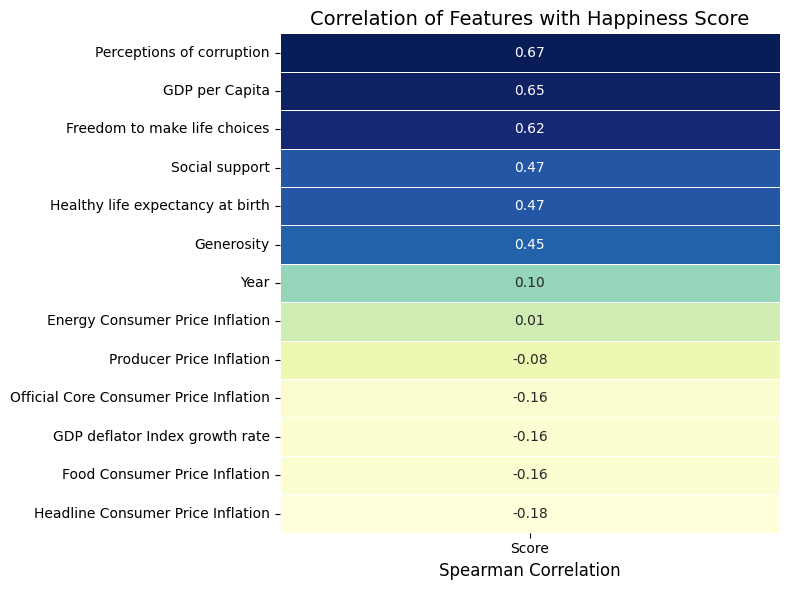

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Compute Spearman correlation matrix
corr_matrix = numeric_df.corr(method='spearman')
#Extract & sort correlation with Score
score_corr = corr_matrix['Score'].drop('Score')  # Remove self-correlation
score_corr = score_corr.sort_values(ascending=False)  # Sort descending
#Plot smaller heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(score_corr.to_frame(), annot=True, cmap='YlGnBu', cbar=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation of Features with Happiness Score", fontsize=14)
plt.xlabel("Spearman Correlation", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import os
os.makedirs('images', exist_ok=True)  # Create folder

plt.savefig('images/score_correlation_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
print(top_10_unique[['Country', 'Score', 'Year', 'Perceptions of corruption']])

          Country   Score  Year  Perceptions of corruption
360       Finland  7.8420  2021                    0.48100
304       Denmark  7.6456  2020                    0.49526
846        Norway  7.5940  2018                    0.34000
1057  Switzerland  7.5870  2015                    0.41978
460       Iceland  7.5610  2015                    0.14145
793   Netherlands  7.4880  2019                    0.29800
513        Israel  7.4730  2023                    0.15800
206        Canada  7.4270  2015                    0.32957
643    Luxembourg  7.4040  2022                    0.38800
1055       Sweden  7.3840  2022                    0.51200


In [ ]:
print(bottom_10_unique[['Country', 'Score', 'Year', 'Perceptions of corruption']])

           Country  Score  Year  Perceptions of corruption
1032     Sri Lanka  4.471  2018                    0.05000
469          India  4.565  2015                    0.08492
1148        Uganda  4.636  2021                    0.05400
402          Ghana  4.657  2018                    0.02900
1118       Tunisia  5.045  2016                    0.08170
1158       Ukraine  5.084  2022                    0.01700
954        Senegal  5.132  2021                    0.08800
1013  South Africa  5.194  2022                    0.04600
1078    Tajikistan  5.199  2018                    0.03400
16         Albania  5.199  2022                    0.02800


In [ ]:
average_col2 = df['GDP per Capita'].mean()
print(average_col2)

In [ ]:
print(top_10_unique[['Country', 'Score', 'Year', 'GDP per Capita']])

In [ ]:
print(bottom_10_unique[['Country', 'Score', 'Year', 'GDP per Capita']])

In [ ]:
average_col3 = df['Freedom to make life choices'].mean()
print(average_col3)

In [ ]:
print(top_10_unique[['Country', 'Score', 'Year', 'Freedom to make life choices']])

In [ ]:
print(bottom_10_unique[['Country', 'Score', 'Year', 'Freedom to make life choices']])